In [3]:
import nsepy as nse
import datetime
import urllib3 
import random 
import numpy as np 
from fbprophet import Prophet 
import pandas as pd
import nsepy as nse
import datetime
from nsetools import Nse
nsel = Nse()
stock_list = nsel.get_stock_codes() 
stock_list= {v: k for k, v in stock_list.items()} 
Today = datetime.datetime.now() 
number_of_company = int(input('Enter the number of company:\t'))
 # taking the number of companies to predict 
company_list =[] 
for _ in range(number_of_company): 
 name = input('Enter the Company to Predict\t:\t') 
 company_list.append(name) 
 numbered = list(company_list) 
 stock_data = list(company_list) 
for i in range(number_of_company):
 stock_data[i] = nse.get_history(symbol=company_list[i], start=datetime.datetime(2019,11,1), end=datetime.datetime(2021,3,27))

Importing plotly failed. Interactive plots will not work.


Enter the number of company:	1
Enter the Company to Predict	:	CDSL


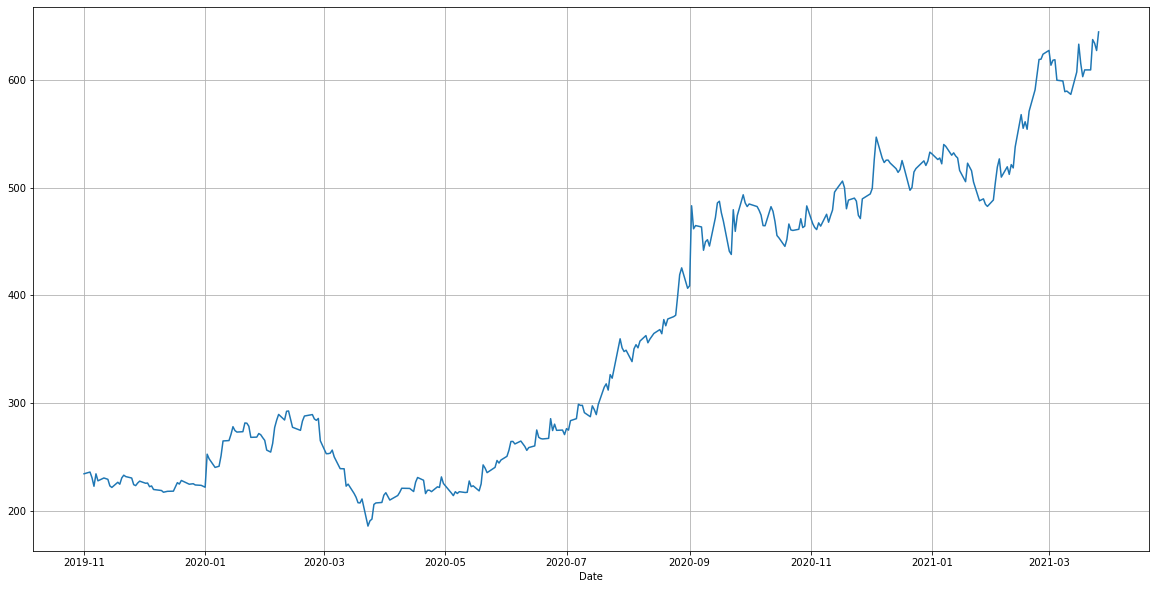

In [7]:
# Import Matplotlib’s `pyplot` module as `plt`
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
# Plot the closing prices for `df`
stock_data[0]['Close'].plot(grid=True)
# Show the plot
plt.show()
df_stock=stock_data[0]

<Figure size 1440x720 with 0 Axes>

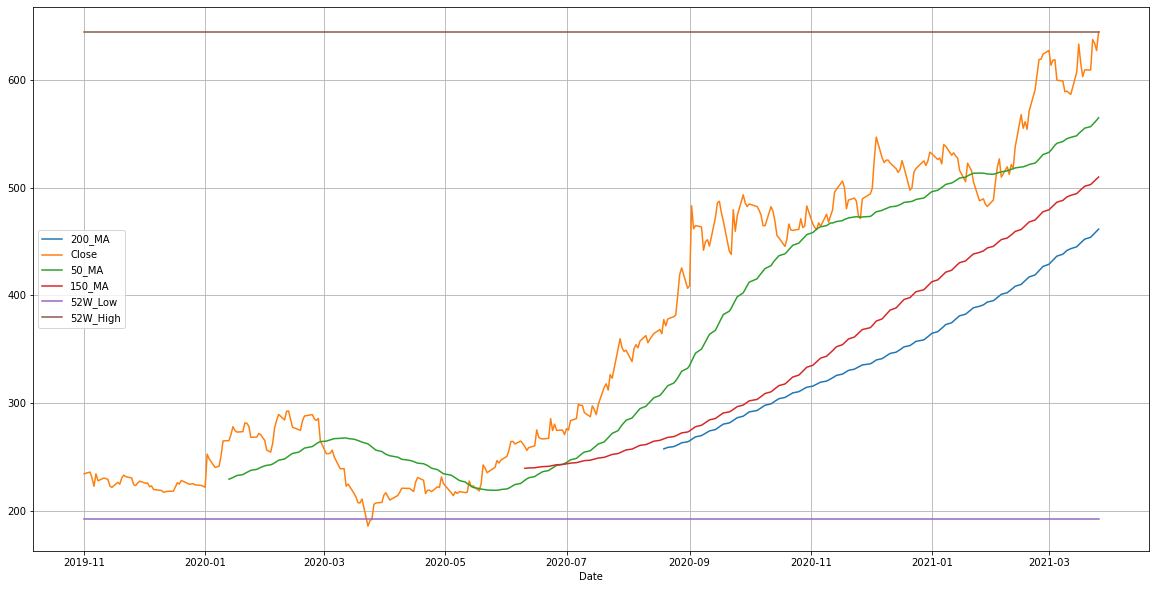

In [9]:
df_stock['200_MA']=df_stock['Close'].rolling(window=200).mean()
df_stock['150_MA']=df_stock['Close'].rolling(window=150).mean()
df_stock['50_MA']=df_stock['Close'].rolling(window=50).mean()
df_stock['52W_Low']=df_stock['Close'][-252:].min()
df_stock['52W_High']=df_stock['Close'][-252:].max()
# Import Matplotlib’s `pyplot` module as `plt`
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
# Plot the closing prices for `df`
df_stock[['200_MA','Close','50_MA','150_MA','52W_Low','52W_High']].plot(grid=True,figsize=(20,10))
# Show the plot
plt.show()

In [10]:
metrics = {}
metrics['200 MA'] = df_stock['200_MA'][-1]
metrics['150 MA'] = df_stock['150_MA'][-1]
metrics['50 MA'] = df_stock['50_MA'][-1]
metrics['200 MA_1mago'] = df_stock['200_MA'][-30]
metrics['150 MA_1mago'] = df_stock['150_MA'][-30]
metrics['200 MA_2mago'] = df_stock['200_MA'][-60]
metrics['150 MA_2mago'] = df_stock['150_MA'][-60]
metrics['52W_Low'] = df_stock['Close'][-252:].min()
metrics['52W_High'] = df_stock['Close'][-252:].max()
metrics['price'] = df_stock['Close'][-1]
#Current Price is at least 30% above 52 week low (1.3*low_of_52week)
metrics['Above_30%_low'] = metrics['52W_Low'] *1.3
# Condition 7: Current Price is within 25% of 52 week high 
metrics['Within_25%_high'] = metrics['52W_High'] * 0.7
print(metrics)

{'200 MA': 461.54925000000003, '150 MA': 510.02033333333355, '50 MA': 565.0619999999998, '200 MA_1mago': 408.50174999999996, '150 MA_1mago': 459.43966666666677, '200 MA_2mago': 363.18450000000007, '150 MA_2mago': 410.84000000000015, '52W_Low': 192.2, '52W_High': 644.8, 'price': 644.8, 'Above_30%_low': 249.85999999999999, 'Within_25%_high': 451.35999999999996}


In [11]:
metrics['condition1'] = (metrics['price'] > metrics['200 MA']) & (metrics['price'] > metrics['150 MA'])
metrics['condition2'] = metrics['150 MA'] > metrics['200 MA']
#3 The 200-day moving average line is trending up for 1 month 
metrics['condition3'] = metrics['200 MA'] > metrics['200 MA_1mago']
metrics['condition4'] = (metrics['50 MA'] > metrics['200 MA']) & (metrics['50 MA'] > metrics['150 MA'])
metrics['condition5'] = metrics['price'] > metrics['50 MA']
#6 The current stock price is at least 30 percent above its 52-week low
metrics['condition6'] = metrics['price'] > metrics['Above_30%_low']
#7 The current stock price is within at least 25 percent of its 52-week high.
metrics['condition7'] = metrics['price'] > metrics['Within_25%_high']

In [12]:
print("The stock is superperforming stock True/False")
print(metrics['condition1']&metrics['condition2']&metrics['condition3']&metrics['condition4']&metrics['condition5']&metrics['condition6']&metrics['condition7'])

The stock is superperforming stock True/False
True
